<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expectation-and-Variance" data-toc-modified-id="Expectation-and-Variance-1">Expectation and Variance</a></span><ul class="toc-item"><li><span><a href="#Random-Variables" data-toc-modified-id="Random-Variables-1.1">Random Variables</a></span><ul class="toc-item"><li><span><a href="#Probability-Mass-Functions" data-toc-modified-id="Probability-Mass-Functions-1.1.1">Probability Mass Functions</a></span></li></ul></li><li><span><a href="#Expectation" data-toc-modified-id="Expectation-1.2">Expectation</a></span><ul class="toc-item"><li><span><a href="#Linearity-of-Expectation" data-toc-modified-id="Linearity-of-Expectation-1.2.1">Linearity of Expectation</a></span></li></ul></li><li><span><a href="#Variance" data-toc-modified-id="Variance-1.3">Variance</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2">Summary</a></span></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

## Random Variables

Almost all real-world phenomena contain some degree of randomness, making data generation and collection inherently random processes. Since we fit our models on these data, our models also contain randomness. To represent these random processes mathematically, we use random variables.

A **random variable** is an algebraic variable that represents a numerical value determined by a probabilistic event. We typically use capital letters like $ X $ or $ Y $ to denote a random variable. Although random variables can represent either discrete (i.e. the number of heads in 10 coin flips) or continuous (i.e. the amount of time we wait at a bus stop) quantities, we will only use discrete random variables for the purposes of this textbook.

We must always specify what a given random variable represents. For example, we may write that the random variable $ X $ represents the number of heads in 10 coin flips. The definition of a random variable determines the values it can take on. In this example, $ X $ may only take on values between $ 0 $ and $ 10 $.

We must also be able to determine the probability that the random variable takes on each value. For example, the probability that $ X = 0 $ is written as $ P(X = 0) = (0.5)^{10} $.

### Probability Mass Functions

The **probability mass function (PMF)** or the **distribution** of a random variable $X$ yields the probability that $X$ takes on each of its possible values. If we let $\mathbb{X}$ be the set of values that $X$ can take on and $x$ be a particular value in $\mathbb{X}$, the PMF of $X$ must satisfy the following rules:

$$
1) \sum_{x \in \mathbb{X}} \mathbb{P}(X = x) = 1
$$

$$
2) \text{ For all } x \in \mathbb{X}, 0 \leq \mathbb{P}(X = x) \leq 1
$$

The first rule states that the probabilities for all possible values of $ X $ sum to $ 1 $.

The second rule states that each individual probability for a given value of $ X $ must be between $ 0 $ and $ 1 $.

Suppose we let $ X $ represent the result of one roll from a fair six-sided die. We know that $ X \in \{1, 2, 3, 4, 5, 6\} $ and that $ P(X = 1) = P(X = 2) = \ldots = P(X = 6) = \frac{1}{6} $. We can plot the PMF of $ X $ as a probability distribution:

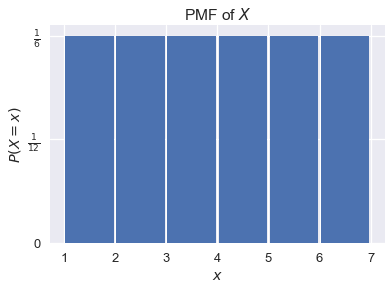

In [2]:
# HIDDEN
plt.hist(np.arange(1, 7), bins=np.arange(1, 7.1, 1), normed=True, rwidth=0.95)
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')
plt.yticks((0, 1/12, 1/6), ('0', r'$\frac{1}{12}$', r'$\frac{1}{6}$'))
plt.title('PMF of $X$');

### Joint Distributions

The notion of PMFs for single random variables extends naturally to joint distributions for multiple random variables; in particular, the *joint distribution* of a set of random variables yields the probability that these random variables simultaneously take on a specific set of values.

As an example, let the random variable $ X $ represent the number of heads in 10 coin flips, and let $ Y $ represent the number of tails in the same set of 10 coin flips. We can note that $P(X=0, Y=10) = P(X=10, Y=0) = (0.5)^{10}$. Meanwhile $P(X=6, Y=6) = 0$ since we cannot possibly have 6 heads and 6 tails in 10 coin flips.

#### Marginal Distributions

Sometimes, we have the joint distribution for two random variables $X$ and $Y$, but we want to find the *marginal distribution* for $X$. In other words, we would like to find the PMF of $X$ given the joint distribution of $X$ and $Y$. To find the probability that $X$ takes on a particular value, we must consider all possible values of $Y$ (denoted by $\mathbb{Y}$) that can simultaneously happen with $X$ and sum over all of these joint probabilities:

$$
\begin{aligned}
\sum_{y \in \mathbb{Y}} P(X=x, Y=y) &= P(X=x)
\end{aligned}
$$

We can prove this identity as follows:

$$
\begin{aligned}
\sum_{y \in \mathbb{Y}} P(X=x, Y=y)	&= \sum_{y \in \mathbb{Y}} P(X=x) \times P(Y=y \; \vert \; X=x)\\
&= P(X=x) \times \sum_{y \in \mathbb{Y}} P(Y=y \; \vert \; X=x)\\
&= P(X=x)
\end{aligned}
$$

In the last line of this proof, we treated $Y \; \vert \; X = x$ as a random variable with some unknown PMF. This is important since we used the property that the probabilities in a PMF sum to $1$, which means that $\sum_{y\in \mathbb{Y}} \mathbb{P}(Y = y \; \vert \; X = x) = 1$.

#### Independence

Two random variables $X$ and $Y$ are independent if the value of one random variable has no influence on the value of the second. Consider the coin flipping example earlier in the section where $ X $ represents the number of heads in 10 coin flips, and $ Y $ represents the number of tails in the same set of 10 coin flips. In this instance, $ X $ and $ Y $ are not independent; if we know $X = 5$, then we know for certain that $Y = 5$. However if we did not know that $X = 5$, $ Y $ could have been any value from 0 to 10.

As another example, let $ X $ be the same as before, but $ Y $ now represents the number of sixes in a set of 10 dice rolls. Since the result of the coin flips has no effect on the dice rolls, we can say that $ X $ and $ Y $ are independent in this example; knowing $X = 5$ tells us nothing about the value of $ Y $.

#### Example: Sampling

Suppose we have a small dataset of four people:

In [3]:
# HIDDEN
data={"Name":["Carol","Bob","John","Dave"], 'Age': [50,52,51,50]}
people = pd.DataFrame(data)
people

,Age,Name
0,50,Carol
1,52,Bob
2,51,John
3,50,Dave


Suppose we sample two people from this dataset with replacement. If the random variable $ Z $ represents the difference between the ages of the first and second persons in the sample, what is the PMF of $ Z $?

To approach this problem, we define two new random variables. We define $ X $ as the age of the first person and $ Y $ as the age of the second. Then, $ Z = X - Y $. Then, we find the joint probability distribution of $ X $ and $ Y $: the probability of each value that $ X $ and $ Y $ can take on simultaneously. In this case, note that $ X $ and $ Y $ are independent and identically distributed; the two random variables represent two independent draws from the same dataset, and the first draw has no influence on the second. For example, the probability that $ X = 51 $ and $ Y = 50 $ is $ P(X = 51, Y = 50) = \frac{1}{4} \cdot \frac{2}{4} = \frac{2}{16} $. In a similar way, we get:

<table>
  <tr>
    <th></th>
    <th>$Y=50$</th>
    <th>$Y=51$</th>
    <th>$Y=52$</th>
  </tr>
  <tr>
    <td>$X=50$</td>
    <td>4/16</td>
    <td>2/16</td>
    <td>2/16</td>
  </tr>
  <tr>
    <td>$X=51$</td>
    <td>2/16</td>
    <td>1/16</td>
    <td>1/16</td>
  </tr>
  <tr>
    <td>$X=52$</td>
    <td>2/16</td>
    <td>1/16</td>
    <td>1/16</td>
  </tr>
</table>

Let us now consider the case in which we sample two people from the same dataset as above but without replacement. As before, we define $X$ as the age of the first person and $Y$ as the age of the second, and $Z = X - Y$. However, now $X$ and $Y$ are not independent; for example, if we know $X = 51$, then $Y \neq 51$. We find the joint distribution of $X$ and $Y$ as follows:

<table>
  <tr>
    <th></th>
    <th>$Y=50$</th>
    <th>$Y=51$</th>
    <th>$Y=52$</th>
  </tr>
  <tr>
    <td>$X=50$</td>
    <td>2/12</td>
    <td>2/12</td>
    <td>2/12</td>
  </tr>
  <tr>
    <td>$X=51$</td>
    <td>2/12</td>
    <td>0</td>
    <td>1/12</td>
  </tr>
  <tr>
    <td>$X=52$</td>
    <td>2/12</td>
    <td>1/12</td>
    <td>0</td>
  </tr>
</table>

We can also find the marginal distribution of $Y$ from the table:

$$
\begin{aligned}
P(Y = 50) &= P(Y = 50, X = 50) + P(Y = 50, X = 51) + P(Y = 50, X = 52) \\
&= \frac{2}{12} + \frac{2}{12} + \frac{2}{12} \\
&= \frac{1}{2} \\
P(Y = 51) &= \frac{2}{12} + 0 + \frac{1}{12} = \frac{1}{4} \\
P(Y = 52) &= \frac{2}{12} + \frac{1}{12} + 0 = \frac{1}{4}
\end{aligned}
$$

Even though we are sampling without replacement, note that $X$ and $Y$ still have the same distribution!

## Summary

In this section, we learn that random variables are variables with multiple possible outcomes. These outcomes must be defined completely and precisely—each outcome must have a well-defined probability of occurrence. 